# Подготовительная работа

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("drive/MyDrive/data for colab/HR_Analytics.csv.csv", sep=",")

In [ ]:
def show_normal_distribution(keys):
  fig, axes = plt.subplots(ncols=len(keys))
  fig.set_size_inches(8 * len(keys), 6)
  axes = axes.flatten()

  for key, ax in zip(keys, axes):
    ax.hist(data[key], density=True, bins=23)

    loc = data[key].mean()
    scale = data[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

In [ ]:
def q_q(keys):
  fig, axes = plt.subplots(ncols=len(keys))
  fig.set_size_inches(8 * len(keys), 4)
  axes = axes.flatten()

  for key, ax in zip(keys, axes):
      samples = data[key]
      
      loc = samples.mean()
      scale = samples.std()
      
      interval = np.linspace(0, 1, samples.shape[0])[1:-1]
      x = stats.norm.ppf(interval, loc=loc, scale=scale)
      y = np.quantile(samples, interval)
      
      ax.scatter(x, y, s=5)
      ax.plot(x, x, color='C1', linestyle='dashed')
      
      ax.set_title(key)
      ax.set_xlabel('Теоретические квантили')
      ax.set_ylabel('Квантили выборки')

In [ ]:
def stat(keys):
  for key in keys:
      print(key)
      samples = data[key]
      loc = samples.mean()
      scale = samples.std()

      for i in range(1, 4):
          true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
          sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

          print(f'{i} sigma(s)')
          print(f'\ttheoretical:\t{true_value}')
          print(f'\tsample:\t\t{sample_value}')

# Данные

В работе был проанализирован датасет [Employee Attrition and Factors](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors), который представляет из себя базу данных сотрудников (~1470 записей) и их характеристик. Всего в датасете представлено 35 колонок — полей, отвечающих за те или иные данные о сотруднике, подробнее о которых ниже.

In [ ]:
data.shape

(1470, 35)

Колонки, которые были использованы в анализе:

Column | Details
--- | ---
Age | The age of the employee. (Numerical)
Gender |	The gender of the employee. (Categorical)
MonthlyIncome | The monthly income of the employee. (Numerical)
TotalWorkingYears | The total number of years the employee has worked. (Numerical)

In [ ]:
data = data[["Age", "Gender", "MonthlyIncome", "TotalWorkingYears"]]

Все эти данные являются числовыми.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   Gender             1470 non-null   object
 2   MonthlyIncome      1470 non-null   int64 
 3   TotalWorkingYears  1470 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 46.1+ KB


Пропусков по этим данным нет.

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

По матрице корреляций можно увидеть, что эти переменные связаны друг с другом. Эта связь и будет предметом анализа в этой работе.

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'MonthlyIncome'),
  Text(0, 2.5, 'TotalWorkingYears')])

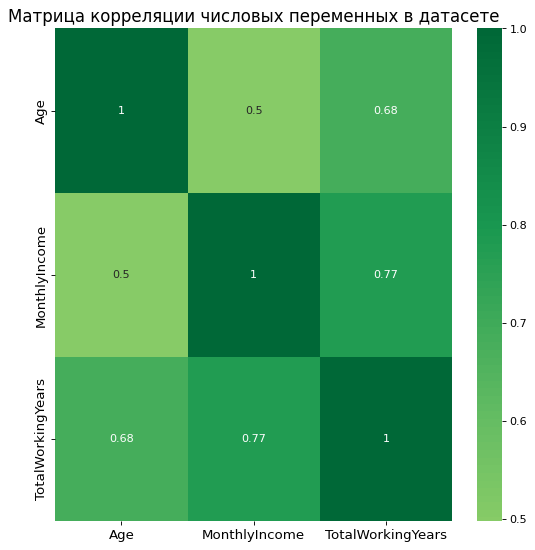

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(
    data.corr(),
    xticklabels=data.corr().columns,
    yticklabels=data.corr().columns,
    cmap="RdYlGn",
    center=0,
    annot=True
)

plt.title("Матрица корреляции числовых переменных в датасете", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Анализ

## Первичный анализ данных

### Проверка на нормальное распределение (гистограммы)

Посмотрим на графики распределений численных переменных.

График возраста сильнее всего похож на график нормального распределения, но нужнается в дополнительном анализе.

Графики `MonthlyIncome` и `TotalWorkingYears` визуально далеки от нормального.

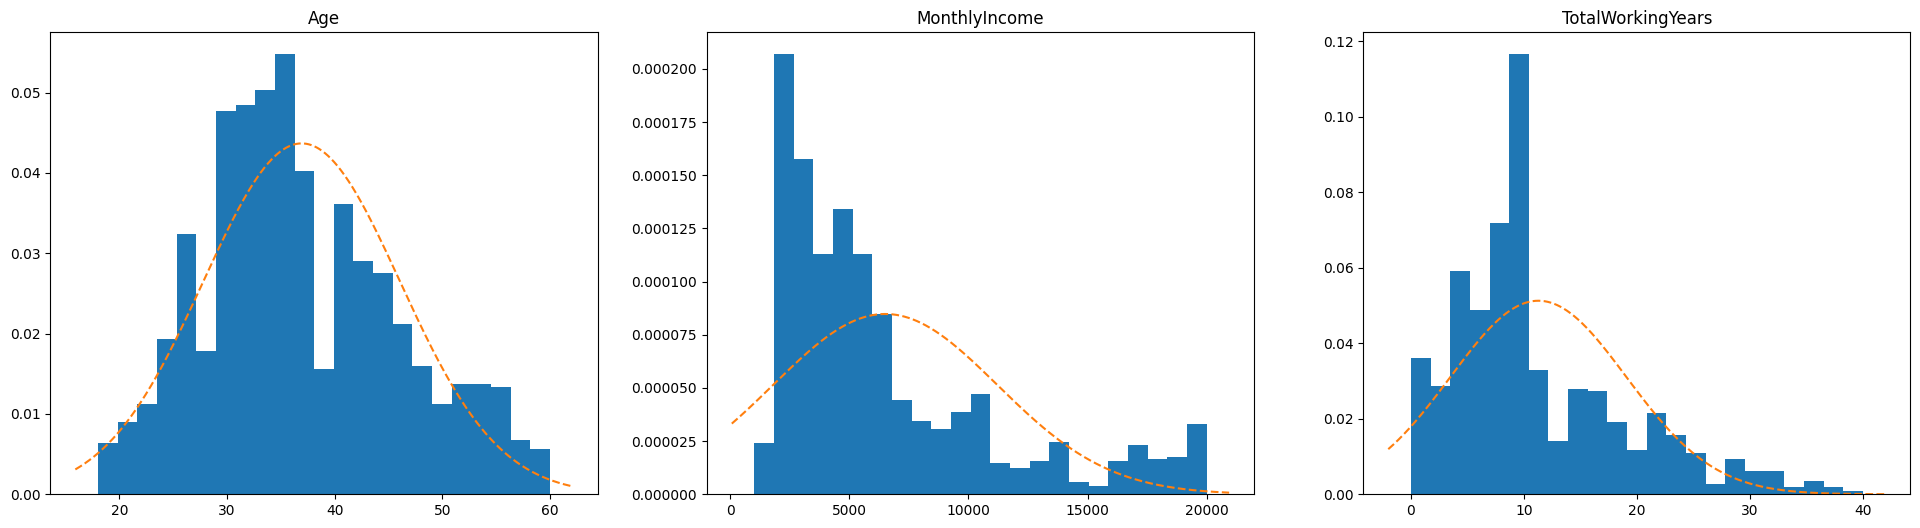

In [ ]:
show_normal_distribution(["Age", "MonthlyIncome", "TotalWorkingYears"])

### Проверка на нормальное распределение (квантили)

По графику возраста можно сделать такой же вывод, как и раньше, что он практически распределен нормально.

График `TotalWorkingYears` тоже близок к нормальному. А вот `MonthlyIncome` уже трудно назвать распределенным нормально.

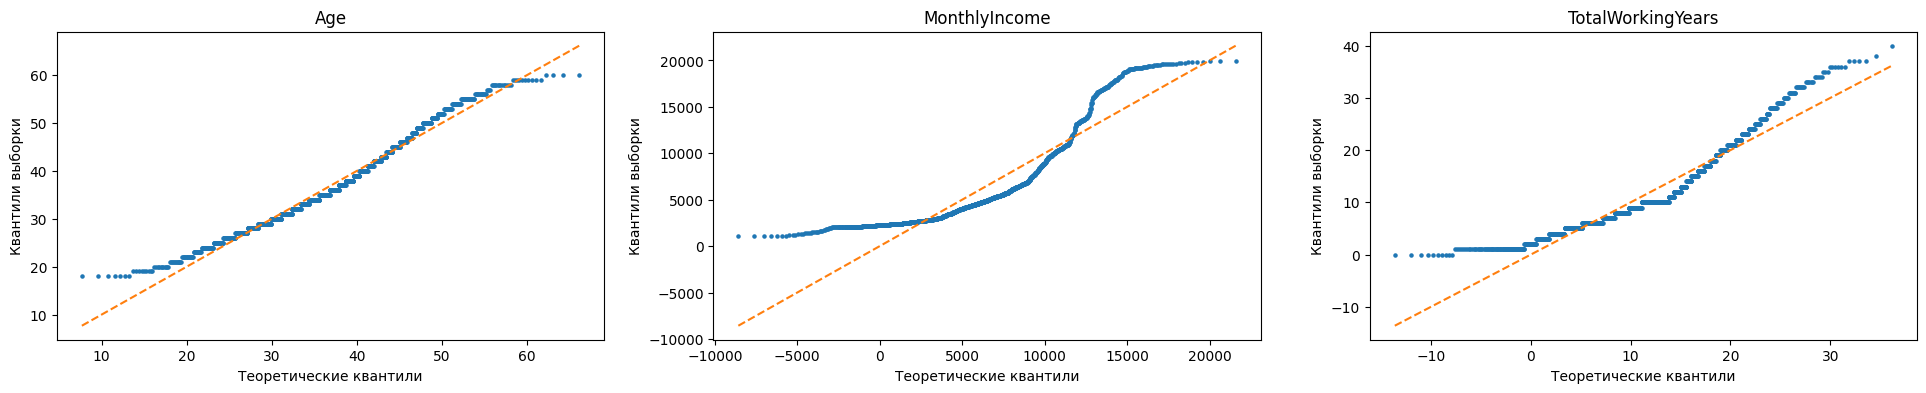

In [ ]:
q_q(["Age", "MonthlyIncome", "TotalWorkingYears"])

### Статистические показатели

Ближе всего к нормальному оказывается возраст.

В пределах одной сигма у значения `MonthlyIncome` видно сильное отклонение, но в 2 и 3 сигма уже близко к нормальному.

В пределах одной сигма `TotalWorkingYears` ближе к нормальному, чем `MonthlyIncome`, но все еще далеко. А в пределах 2 и 3 сигма все тоже уже очень близко к нормальному.

In [ ]:
keys = ["Age", "MonthlyIncome", "TotalWorkingYears"]
stat(keys)

Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6938775510204082
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9625850340136054
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0
MonthlyIncome
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8360544217687075
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9129251700680272
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0
TotalWorkingYears
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.726530612244898
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9428571428571428
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9891156462585035


## Возраст и ежемесячная заработная плата

По графику явно видно, что до 40 лет у каждого возраста есть некая заработная планка, которая постепенно увеличивается. После 40 лет уже нет такого сильного роста в зарплате. Это можно объяснить тем, что до 40 лет люди набираются опыта и продвигаются по карьерной лестнице, увеличивая свой заработок, а после — выходят на удовлетворяющее их плато.

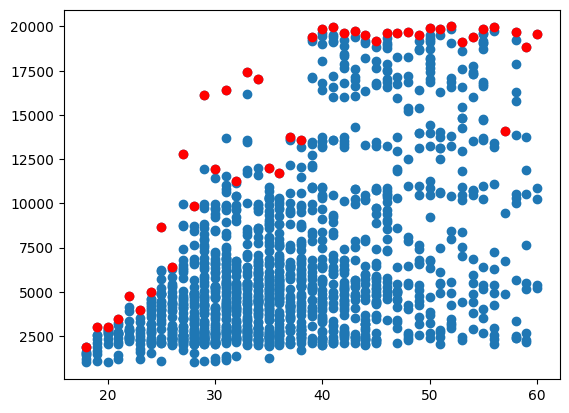

In [ ]:
max_lines = data.groupby("Age", as_index=False)["MonthlyIncome"].max()

plt.scatter(data["Age"], data["MonthlyIncome"])
plt.scatter(max_lines["Age"], max_lines["MonthlyIncome"], color="r")
plt.show()

Зависимость месячной зарплаты от возраста прослеживается, но она незначительная. Люди в любом возрасте могут зарабатывать мало, и если человеку много лет, это вовсе не означает, что он будет зарабатывать много.


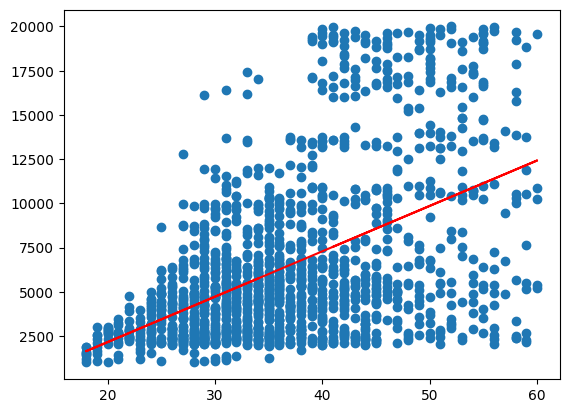

R score: 0.24785916980965295


In [ ]:
model = LinearRegression()
model.fit(data[["Age"]], data[["MonthlyIncome"]])

plt.scatter(data["Age"], data["MonthlyIncome"])
plt.plot(data[["Age"]], model.predict(data[["Age"]]), color="r")
plt.show()

print(f"R score: {model.score(data[['Age']], data[['MonthlyIncome']])}")

In [ ]:
stats.ttest_rel(data["Age"], data["MonthlyIncome"])

TtestResult(statistic=-52.70860671605156, pvalue=0.0, df=1469)

## Количество отработанных лет и ежемесячная заработная плата

А вот месячная зарплата уже неплохо коррелирует с количеством отработанных лет. Это позволяет сделать выводы, что опыт сильно ценится.

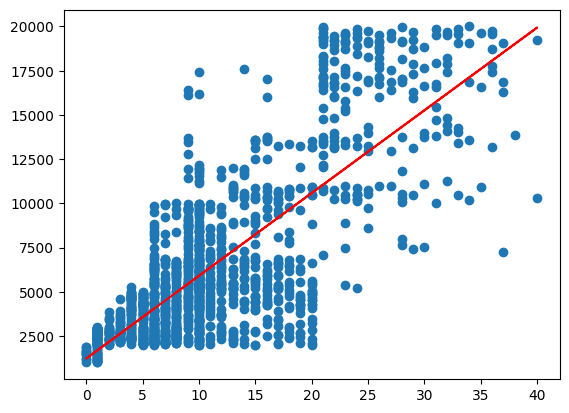

R score: 0.5973639701055967


In [ ]:
model = LinearRegression()
model.fit(data[["TotalWorkingYears"]], data[["MonthlyIncome"]])

plt.scatter(data["TotalWorkingYears"], data["MonthlyIncome"])
plt.plot(data[["TotalWorkingYears"]], model.predict(data[["TotalWorkingYears"]]), color="r")
plt.show()

print(f"R score: {model.score(data[['TotalWorkingYears']], data[['MonthlyIncome']])}")

## Пол и ежемесячная заработная плата

Как видно из графиков ниже, пол не влияет на зарплату.

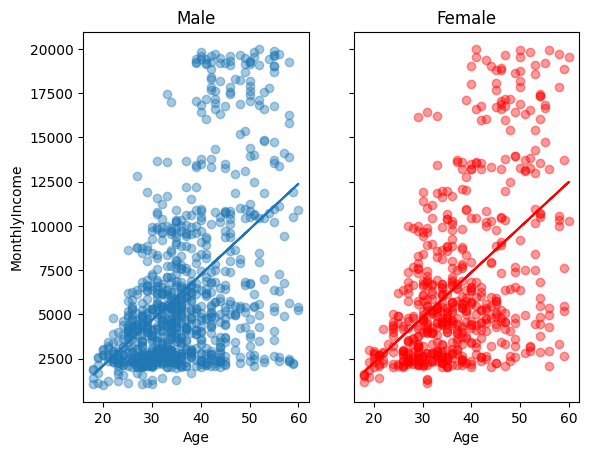

In [ ]:
data.groupby("Gender", as_index=False)

male = data[data["Gender"] == "Male"]
male_model = LinearRegression()
male_model.fit(male[["Age"]], male[["MonthlyIncome"]])

female = data[data["Gender"] == "Female"]
female_model = LinearRegression()
female_model.fit(female[["Age"]], female[["MonthlyIncome"]])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(male["Age"], male["MonthlyIncome"], alpha=0.4)
ax1.plot(male[["Age"]], male_model.predict(male[["Age"]]))
ax1.set_title("Male")
ax1.set_xlabel("Age")
ax1.set_ylabel("MonthlyIncome")

ax2.scatter(female["Age"], female["MonthlyIncome"], alpha=0.4, color="r")
ax2.plot(female[["Age"]], female_model.predict(female[["Age"]]), color="r")
ax2.set_title("Female")
ax2.set_xlabel("Age")

plt.show()

# Вывод

С возрастом заработная плата увеличивается, поскольку работники набираются опыта и растут в должности в компании. Также можно сделать вывод, что чем больше люди работают в одной области, тем выше у них зарплата, следовательно, опыт сильно ценится работодателями.

У молодого персонала всегда есть верхняя планка, которую сложно преодолеть. Это явно связано с нехваткой опыта — работодатели не хотят переплачивать пока что не освоившимся в профессии работникам.

Однако один только возраст сильно не влияет на зарплату: судя по графикам, есть люди в 50–60 лет, которые зарабатывают столько же, сколько 20-ти летние.

Из последних графиков видно, что пол в целом не влияет на заработную плату ни одной возрастной категории.